# Exploratory Data Analysis: Mobility and COVID-19

### The goal of this notebook is to explore the dataset we have produced during the data wrangling step which contains data on mobility and COVID-19 Infection Rate 

In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In the previous notebook we merged three datasets. One with mobilty data from apple, one with mobility date from google and another with COVID-19 infection data from the NY Times. We matched everything on the state level. 

Let's explore the dataset!

### Exploring the full dataset

In [93]:
# We will first load in the dataset containing data from apple, google and infections
full_df= pd.read_csv('Data/full_data_state_level.csv', index_col= 0)
full_df.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths
0,Alabama,2020-03-13,7.0,32.0,26.0,7.0,-2.0,0.0,160.430000,110.95,110.84,6,0
1,Alabama,2020-03-14,1.0,28.0,55.0,12.0,4.0,0.0,169.976429,116.64,114.48,12,0
2,Alabama,2020-03-15,-7.0,16.0,16.0,6.0,-4.0,2.0,119.303036,78.24,59.90,23,0
3,Alabama,2020-03-16,-2.0,24.0,22.0,2.0,-10.0,4.0,116.498750,91.18,77.73,29,0
4,Alabama,2020-03-17,-11.0,17.0,25.0,-1.0,-17.0,7.0,107.171250,84.92,72.97,39,0


In [94]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5711 entries, 0 to 5710
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  5711 non-null   object 
 1   date                   5711 non-null   object 
 2   retail_and_recreation  5711 non-null   float64
 3   grocery_and_pharmacy   5711 non-null   float64
 4   parks                  5682 non-null   float64
 5   transit                5711 non-null   float64
 6   workplace              5711 non-null   float64
 7   residential            5711 non-null   float64
 8   driving gps hits       5711 non-null   float64
 9   transit gps hits       3871 non-null   float64
 10  walking gps hits       4415 non-null   float64
 11  cases                  5711 non-null   int64  
 12  deaths                 5711 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 624.6+ KB


Notes 

It looks like we have a lot of null vales in the transit and walking gps hits columns 



#### Question: How many null values do we have in each column? 

In [95]:
num_entries= len(full_df.index)
perc_nan= (num_entries- full_df.count())/ num_entries
perc_nan

state                    0.000000
date                     0.000000
retail_and_recreation    0.000000
grocery_and_pharmacy     0.000000
parks                    0.005078
transit                  0.000000
workplace                0.000000
residential              0.000000
driving gps hits         0.000000
transit gps hits         0.322185
walking gps hits         0.226930
cases                    0.000000
deaths                   0.000000
dtype: float64

Notes

-31% of the transit GPS data is null 

-22 % of the walking GPS data is null

#### Questions: What is the nature of the null values in Transit and Walking GPS Hits?

In [96]:
# find where the null transit values are 
transit_null= full_df[full_df['transit gps hits'].isna()]['state'].unique()
print(transit_null)
print('The null values for the transit gps hit is spread across {} different states.'.format(len(transit_null)))

['Alaska' 'Arkansas' 'Delaware' 'Idaho' 'Iowa' 'Kansas' 'Maine'
 'Mississippi' 'Montana' 'New Hampshire' 'New Jersey' 'North Dakota'
 'South Carolina' 'South Dakota' 'Vermont' 'West Virginia' 'Wyoming']
The null values for the transit gps hit is spread across 17 different states.


In [97]:
# The states that have null values for transit have exclusively null values telling us that data was not collected entirely
# for that state rather than there being interspersed missing values
for state in list(transit_null): 
    print(full_df[full_df['state'] == state]['transit gps hits'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [98]:
# find where the null walking values are 
walking_null= full_df[full_df['walking gps hits'].isna()]['state'].unique()
print(walking_null)
print('The null values for the walking gps hit is spread across {} different states.'.format(len(walking_null)))

['Arkansas' 'Delaware' 'Maine' 'Mississippi' 'Montana' 'New Hampshire'
 'New Jersey' 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia'
 'Wyoming']
The null values for the walking gps hit is spread across 12 different states.


In [99]:
# The states that have null values for transit have exclusively null values telling us that data was not collected entirely
# for that state rather than there being interspersed missing values
for state in list(transit_null): 
    print(full_df[full_df['state'] == state]['transit gps hits'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


Notes 

-We can see that for those states which have null values in their walking or transit GPS columns have exclusively null values telling us that rather than having random missing values we have data that wasn't collected entirely for certain states

#### Question: How many states do we have in this dataset? 

In [100]:
full_df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [101]:
print('We have {} states in this dataset.'.format(full_df.state.nunique()))

We have 50 states in this dataset.


#### Question: What dates are contained within this dataset? 

In [102]:
print('This earliest date is {} and the most recent date is {}.'.format(full_df.date.min(), full_df.date.max()))

This earliest date is 2020-02-15 and the most recent date is 2020-06-27.


#### Question: Being that our data starts on different dates depending on the state, what is the distribution of start dates? 

In [103]:
start_dates= pd.DataFrame(full_df.groupby('state').date.min()).reset_index().sort_values('date')
print('We have {} unique start dates within the dataset'.format(start_dates.date.nunique()))

We have 18 unique start dates within the dataset


In [104]:
print('As we saw previously, the earliest start date in our data is {}.'.format(start_dates.date.min()))
print('The latest start date in our data is {}.'.format(start_dates.date.max()))

As we saw previously, the earliest start date in our data is 2020-02-15.
The latest start date in our data is 2020-03-17.


Text(0, 0.5, 'Date')

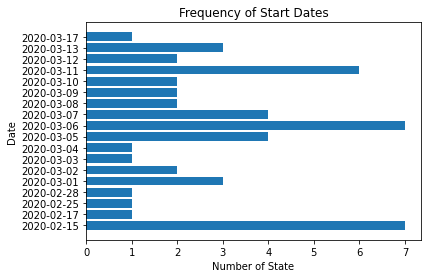

In [105]:
date_list= list(start_dates.date.unique())
start_date_list= list(start_dates.date)
counts=[]

for date in date_list:
    occ= start_date_list.count(date)
    counts.append(occ)
    
plt.barh(y=date_list, width= counts)
plt.title('Frequency of Start Dates')
plt.xlabel('Number of State')
plt.ylabel('Date')


#### Question: How have GPS hits changed over the time? 

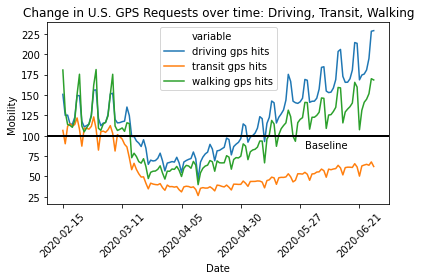

In [106]:
import matplotlib.ticker as ticker

# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
tl= full_df[['date', 'driving gps hits', 'transit gps hits', 'walking gps hits']]
tl= tl.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=tl, hue='variable', err_style=None)

# set the axis to be number of days rathe r than the actual date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at baseline which is 100
ax.axhline(100, color='black', lw=2)

plt.title('Change in U.S. GPS Requests over time: Driving, Transit, Walking')
plt.xlabel('Date')
plt.ylabel('Mobility')
plt.xticks(rotation=45)
plt.text(120,85,'Baseline',horizontalalignment='right')
plt.tight_layout()
plt.savefig('Images/gps_over_time.png')

Notes

1) All GPS hits dipped in March and April 

2) Walking and Driving GPS hits started to rise again in the middle of April, suprapping the baseline towards the beggining of may 

3) Transit GPS hits have stayed depressed throughout our time series 

#### Question: How has movement to different categories of places changed over time? 

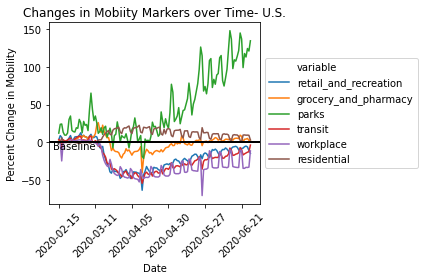

In [107]:
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
mvmt= full_df[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential']]
mvmt= mvmt.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=mvmt, hue='variable', legend='brief', err_style=None)

# Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at 0
ax.axhline(0, color='black', lw=2)

plt.title('Changes in Mobiity Markers over Time- U.S.')
plt.xlabel('Date')
plt.ylabel('Percent Change in Mobility')
plt.xticks(rotation=45)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.text(25,-10,'Baseline',horizontalalignment='right')
plt.tight_layout()
plt.savefig('Images/moblity_US.png')

Notes

1) Transit station visits, workplace visits, retail/recreation visits and grocery visits have all decreased the most over time. 

2) Residential visits have risen over time 

3) Grocery/Pharamacy visits saw a slight decrease from March through April and then have rise slowly

4) Parks visits took a slight dip but have seen a large rise since the end of April



#### Question: How have cases grown over time within the U.S. as a whole? 

Text(0, 0.5, 'Number of Cases')

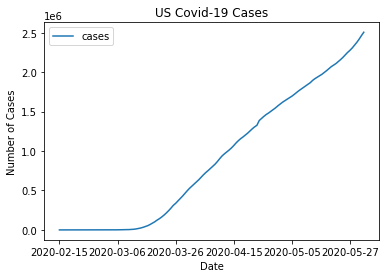

In [108]:
# Make a pivot table that holds the sum of all the cases for each date in the dataset
sum_cases= pd.pivot_table(data= full_df, index= 'date', values= ['cases'], aggfunc= sum)
# Make a lineplot 
sum_cases.plot(kind='line')

# Set the ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))


plt.title('US Covid-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

#### Question: How many cases are there in the whole country as of the most recent date? How many cases were there in the whole country on the first day of our dataset? 

In [109]:
cases_day_one= full_df[full_df['date'] == full_df.date.min()]['cases'].sum()
cases_most_recent= full_df[full_df['date'] == full_df.date.max()]['cases'].sum()
print('There were {cases_day_one} cases in the US on {date_min}.'.format(cases_day_one= cases_day_one, date_min= full_df.date.min()))
print('There were {cases_most_recent} cases in the US on {date_max}.'.format(cases_most_recent= cases_most_recent, date_max= full_df.date.max()))

There were 15 cases in the US on 2020-02-15.
There were 2507310 cases in the US on 2020-06-27.


### Adding a Growth rate

What we are really interested in is how the infection growth rate relates to mobility so we are going to add a growth rate column to the data for some more useful analysis.

In [110]:
# Add a growth rate column that takes the percent change day to day of the cases column
full_df['Growth Rate']= full_df.cases.pct_change() * 100

In [111]:
# Because .pct_change() using the previous it will get an incorrect value everytime we hit a new state in the data because
# it is using the case count of the previous state
# To remededy this we find the 49 lowest growth rate values
incorrect_growth= list(full_df['Growth Rate'].nsmallest(49))
# We then replace all those low growth rates with 0 
full_df.loc[full_df["Growth Rate"].isin(incorrect_growth), "Growth Rate"] = 0


In [112]:
# If we pick a random state the growth rate should be 0 for it's first entry
full_df[full_df['state'] == 'Ohio'].head(3)

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate
3861,Ohio,2020-03-09,9.0,7.0,78.0,7.0,1.0,0.0,111.169775,100.776667,100.563333,3,0,0.000000
3862,Ohio,2020-03-10,5.0,6.0,13.0,2.0,0.0,0.0,110.956854,92.666667,98.810000,3,0,0.000000
3863,Ohio,2020-03-11,8.0,11.0,25.0,4.0,0.0,0.0,109.431798,92.321667,95.203333,4,0,33.333333


### Adding a Number of New Cases Columns

Currently the data is represented only as cumulative number of cases. So for each data the cases number represents the cumulative amount of cases recorded to date in that location. Our analysis will be more focused on the growth rate so we will now add a column that represents the number of new cases recorded on that day in that state. 

In [113]:
full_df['Num New Cases']= full_df.cases.diff()

In [114]:
# Because .diff() using the previous it will get an incorrect value everytime we hit a new state in the data because
# it is using the case count of the previous state
# To remededy this we find the 50 lowest growth rate values
incorrect_new_case_num= list(full_df['Num New Cases'].nsmallest(50))
# We then replace all those num new cases with 0 
full_df.loc[full_df["Num New Cases"].isin(incorrect_new_case_num), "Num New Cases"] = 0

# If we pick a random state the growth rate should be 0 for it's first entry
full_df[full_df['state'] == 'California'].head(10)

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases
450,California,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0,149.625000,98.747059,161.364286,7,0,0.000000,0.0
451,California,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0,128.067973,85.542941,127.493810,7,0,0.000000,0.0
452,California,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0,131.830676,98.512353,119.583333,7,0,0.000000,0.0
453,California,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0,114.652568,110.847059,109.419524,7,0,0.000000,0.0
454,California,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0,115.025946,110.649412,112.455238,7,0,0.000000,0.0
455,California,2020-02-20,2.0,1.0,12.0,1.0,0.0,0.0,120.621216,108.973529,114.736667,8,0,14.285714,1.0
456,California,2020-02-21,1.0,0.0,8.0,0.0,1.0,0.0,143.535541,117.529412,139.326190,9,0,12.500000,1.0
457,California,2020-02-22,0.0,0.0,-3.0,-4.0,1.0,1.0,142.735676,97.484118,153.515714,9,0,0.000000,0.0
458,California,2020-02-23,4.0,1.0,16.0,3.0,2.0,0.0,119.011486,88.245294,112.794286,9,0,0.000000,0.0
459,California,2020-02-24,2.0,0.0,12.0,1.0,4.0,0.0,111.661351,109.474706,108.403810,11,0,22.222222,2.0


In [115]:
# Now the smallest entries should all be 0
full_df['Num New Cases'].nsmallest(5)

1070   -158.0
3828    -35.0
773     -15.0
1220     -5.0
1308     -2.0
Name: Num New Cases, dtype: float64

#### Question: Which 3 states in our dataset have the most cases? Which 3 have the least cases? 

In [116]:
# Find the three highest case values for our most recent date
top_three= list(full_df[full_df['date'] == full_df.date.max()]['cases'].nlargest(3))

highest= full_df[full_df['cases'] == top_three[0]]
second_highest= full_df[full_df['cases'] == top_three[1]]
third_highest= full_df[full_df['cases'] == top_three[2]]

# Make a dataframe of the top three most infected states
top_three_df= pd.concat([highest, second_highest, third_highest], axis=0)
top_three_df

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases
3638,New York,2020-06-27,-34.0,-4.0,48.0,-40.0,-19.0,6.0,186.917727,55.618000,132.90400,396669,31105,0.176023,697.0
581,California,2020-06-27,-33.0,-6.0,6.0,-32.0,-16.0,7.0,176.721892,49.085882,169.12619,211453,5902,2.137885,4426.0
3414,New Jersey,2020-06-27,-30.0,-2.0,141.0,-30.0,-14.0,6.0,202.939524,NaN,NaN,172727,14948,0.167596,289.0


In [117]:
# Find the three lowest case values for our most recent date
bottom_three= list(full_df[full_df['date'] == full_df.date.max()]['cases'].nsmallest(3))
bottom_three

lowest= full_df[(full_df['cases'] == bottom_three[0]) & (full_df['date'] == full_df.date.max())]
second_lowest= full_df[(full_df['cases'] == bottom_three[1]) & (full_df['date'] == full_df.date.max())]
third_lowest= full_df[(full_df['cases'] == bottom_three[2]) & (full_df['date'] == full_df.date.max())]

# Make a dataframe of the top three most infected states
bottom_three_df= pd.concat([lowest, second_lowest, third_lowest], axis=0)
bottom_three_df

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths,Growth Rate,Num New Cases
2941,Montana,2020-06-27,-1.0,23.0,188.0,31.0,-11.0,-1.0,313.442727,NaN,NaN,852,22,2.774427,23.0
1256,Hawaii,2020-06-27,-35.0,-21.0,-22.0,-61.0,-26.0,8.0,65.720000,25.77,83.675,856,18,0.705882,6.0
210,Alaska,2020-06-27,5.0,17.0,242.0,10.0,-10.0,-1.0,244.871667,NaN,191.350,1027,12,2.597403,26.0


In [118]:
full_df[full_df['state'] == 'Vermont'].date.max()

'2020-06-27'

In [119]:
# Make a dataset that contains all the data for those states in the top three of infections
top_three_states= list(top_three_df.state.unique())
top_three_full_df= full_df[full_df['state'].isin(top_three_states)]

# Make a dataset that contains all the data for those states in the bottom three
bottom_three_states= list(bottom_three_df.state.unique())
bottom_three_full_df= full_df[full_df['state'].isin(bottom_three_states)]

# Make a dataset that contains both top 3 and bottom 3 most infected states
extremes_full_df= pd.concat([top_three_full_df, bottom_three_df], axis=0)

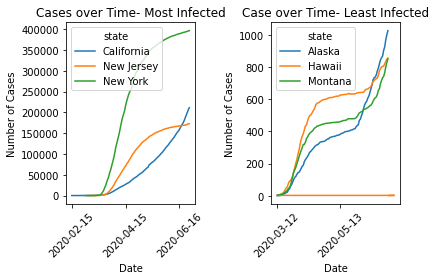

In [120]:
plt.subplot(1, 2, 1)
sns.lineplot(x= top_three_full_df.date, y=top_three_full_df.cases, hue=top_three_full_df.state)

# Set the ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=60))

plt.title('Cases over Time- Most Infected')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation= 45)

plt.subplot(1, 2, 2)
sns.lineplot(x= bottom_three_full_df.date, y=bottom_three_full_df.cases, hue=bottom_three_full_df.state)
# Set the ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=60))

plt.title('Case over Time- Least Infected')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation= 45)

plt.tight_layout()


#### Do trends in Mobility differ between those states most infected and those states least infected? 

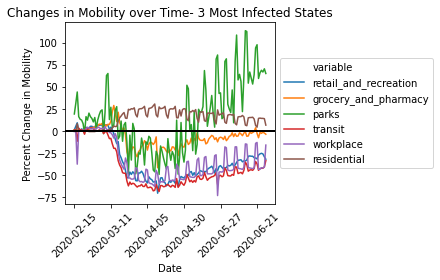

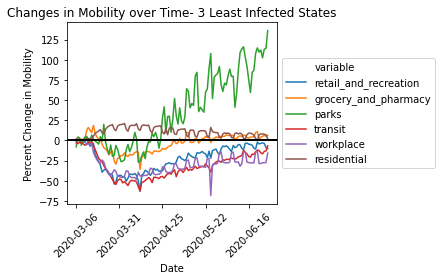

In [121]:
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
mvmt= top_three_full_df[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential']]
mvmt= mvmt.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=mvmt, hue='variable', legend='brief', err_style=None)

# Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at 0
ax.axhline(0, color='black', lw=2)

plt.title('Changes in Mobility over Time- 3 Most Infected States')
plt.xlabel('Date')
plt.ylabel('Percent Change in Mobility')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/mobility_most_infected.png')
plt.show()

# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
mvmt= bottom_three_full_df[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential']]
mvmt= mvmt.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=mvmt, hue='variable', legend='brief', err_style=None)

# Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at 0
ax.axhline(0, color='black', lw=2)

plt.title('Changes in Mobility over Time- 3 Least Infected States')
plt.xlabel('Date')
plt.ylabel('Percent Change in Mobility')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/mobility_least_infected.png')


Notes

-It looks like the trends in mobility don't vary that much between states with the highest infection rate and those with the lowest infection rate

-There appears to be a slightly larger depression in mobility markers in the states that are most affected

-We do see that the least affected states are re-appraoching baseline sooner than those most affected

#### Question: How does GPS activity differ between those states most affected by COVID-19 and those least affected by COVID-19? 

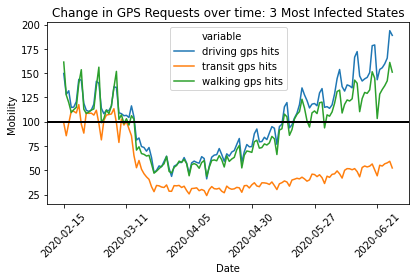

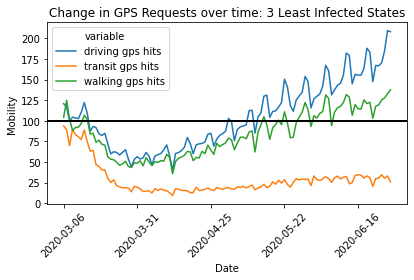

In [122]:
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
gps= top_three_full_df[['date', 'driving gps hits', 'transit gps hits', 'walking gps hits']]
gps= gps.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=gps, hue='variable', err_style=None)

# set the axis to be number of days rather than the actual date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at baseline which is 100
ax.axhline(100, color='black', lw=2)

plt.title('Change in GPS Requests over time: 3 Most Infected States')
plt.xlabel('Date')
plt.ylabel('Mobility')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.savefig('Images/GPS_most_infected.png')
plt.show()

# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
gps= bottom_three_full_df[['date', 'driving gps hits', 'transit gps hits', 'walking gps hits']]
gps= gps.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=gps, hue='variable', err_style=None)

# set the axis to be number of days rather than the actual date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at baseline which is 100
ax.axhline(100, color='black', lw=2)

plt.title('Change in GPS Requests over time: 3 Least Infected States')
plt.xlabel('Date')
plt.ylabel('Mobility')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.savefig('Images/GPS_least_infected.png')
plt.show()

Notes

-GPS Requests follow a similar trend in both the most and least infected states

-GPS Requests start to re-approach baseline sooner and more rapidly in the least affected state

#### Question: What is the relationship between mobility and the growth rate? 

##### Most Infected States

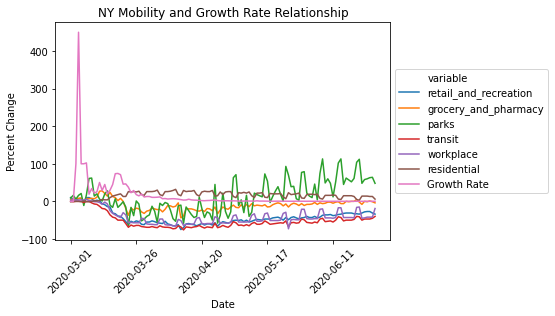

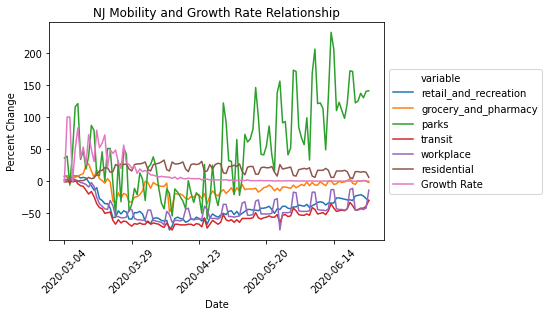

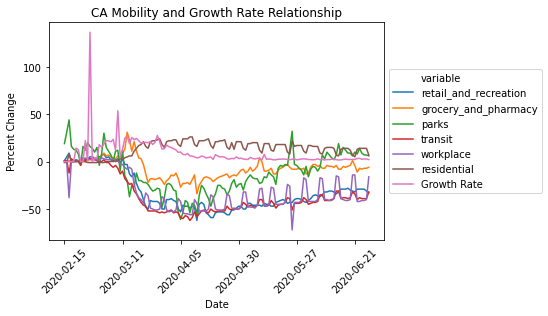

In [123]:
ny= full_df[full_df['state'] == 'New York']
nj= full_df[full_df['state'] == 'New Jersey']
ca= full_df[full_df['state'] == 'California']

# NY Plot
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
ny_trends= ny[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
ny_trends= ny_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=ny_trends, hue='variable', legend='brief')

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('NY Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation=45)
plt.show()

# NJ Plot
nj_trends= nj[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
nj_trends= nj_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=nj_trends, hue='variable', legend='brief')

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('NJ Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation= 45)
plt.show()

# CA Plot 
ca_trends= ca[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
ca_trends= ca_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=ca_trends, hue='variable', legend='brief')

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('CA Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation=45)
plt.show()


##### Least Infected States

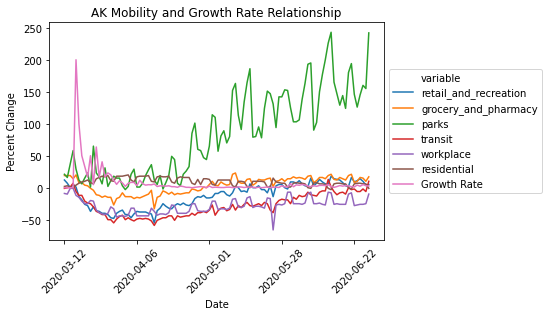

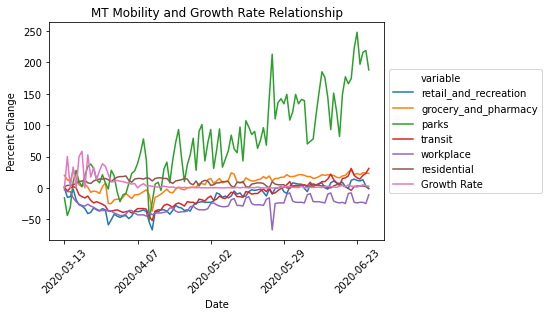

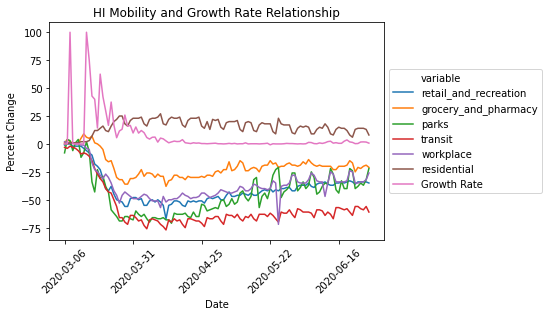

In [124]:

ak= full_df[full_df['state'] == 'Alaska']
mt= full_df[full_df['state'] == 'Montana']
hi= full_df[full_df['state'] == 'Hawaii']


# AK Plot
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
ak_trends= ak[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
ak_trends= ak_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=ak_trends, hue='variable', legend='brief')

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('AK Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation=45)
plt.show()

# MT Plot
mt_trends= mt[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
mt_trends= mt_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=mt_trends, hue='variable', legend='brief')

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('MT Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation= 45)
plt.show()


# HI Plot 
hi_trends= hi[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential', 'Growth Rate']]
hi_trends= hi_trends.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=hi_trends, hue='variable', legend='brief')

#Set the axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('HI Mobility and Growth Rate Relationship')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.xticks(rotation= 45)
plt.show()

#### How do growth trends differ from most to least infected states? 

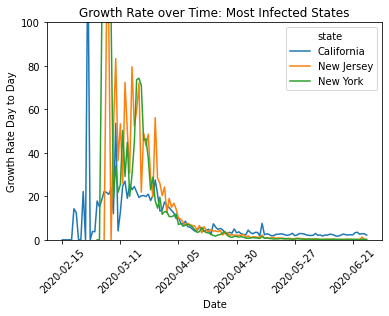

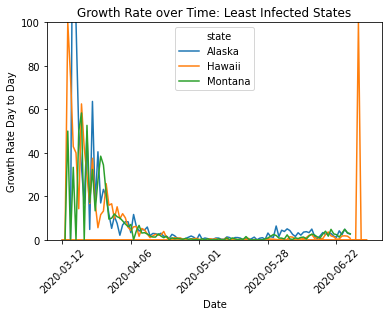

In [125]:
growth= top_three_full_df[['state', 'date', 'Growth Rate']]
growth= growth.melt(id_vars= ['date', 'state'])
sns.lineplot(x='date', y='value', hue='state', data=growth)

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))

plt.ylim(0,100)
plt.title('Growth Rate over Time: Most Infected States')
plt.xlabel('Date')
plt.ylabel('Growth Rate Day to Day')
plt.xticks(rotation=45)
plt.show()

growth= bottom_three_full_df[['state', 'date', 'Growth Rate']]
growth= growth.melt(id_vars= ['date', 'state'])
sns.lineplot(x='date', y='value', hue='state', data=growth)

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))

plt.ylim(0,100)
plt.title('Growth Rate over Time: Least Infected States')
plt.xlabel('Date')
plt.ylabel('Growth Rate Day to Day')
plt.xticks(rotation= 45)
plt.show()

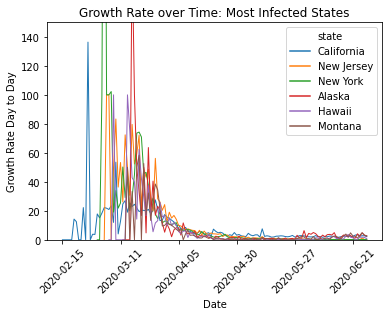

In [126]:
extremes= pd.concat([top_three_full_df, bottom_three_full_df])
extrm= extremes[['state', 'date', 'Growth Rate']]
extrm= extrm.melt(id_vars= ['date', 'state'])
sns.lineplot(x='date', y='value', hue='state', data=extrm, lw=1)

#Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))

plt.ylim(0,150)
plt.title('Growth Rate over Time: Most Infected States')
plt.xlabel('Date')
plt.ylabel('Growth Rate Day to Day')
plt.xticks(rotation= 45)
plt.show()

In [127]:
# Export dataframes created in this notebook 
full_df.to_csv('Data/full_data_growth_included.csv')
top_three_full_df.to_csv('Data/top_states.csv')
bottom_three_full_df.to_csv('Data/bottom_states.csv')


### Next Steps
Now that we have a better understanding of the data we will seek to build a model. The goal of the next notebook will be to select one state and build a model that can predict that states future COVID-19 infection rate based on their current mobility trends